# Avocados

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
filepath = os.path.join('datasets', 'Avocados.csv')
df = pd.read_csv(filepath)

# Head and Tail

In [4]:
df =  df[:14132]                                  # select index position 0-14132
df

,Country or Area,Element,Year,Unit,Value,Value Footnotes
0,Africa,Area harvested,2018.0,ha,385249.0,A
1,Africa,Area harvested,2017.0,ha,85241.0,A
2,Africa,Area harvested,2016.0,ha,88975.0,A
3,Africa,Area harvested,2015.0,ha,81448.0,A
4,Africa,Area harvested,2014.0,ha,87387.0,A
...,...,...,...,...,...,...
14127,Zimbabwe,Production,1994.0,tonnes,587.0,Im
14128,Zimbabwe,Production,1993.0,tonnes,561.0,Im
14129,Zimbabwe,Production,1992.0,tonnes,536.0,Im
14130,Zimbabwe,Production,1991.0,tonnes,511.0,Im


In [5]:
df['Year'] = df['Year'].astype(int)                
df

,Country or Area,Element,Year,Unit,Value,Value Footnotes
0,Africa,Area harvested,2018,ha,385249.0,A
1,Africa,Area harvested,2017,ha,85241.0,A
2,Africa,Area harvested,2016,ha,88975.0,A
3,Africa,Area harvested,2015,ha,81448.0,A
4,Africa,Area harvested,2014,ha,87387.0,A
...,...,...,...,...,...,...
14127,Zimbabwe,Production,1994,tonnes,587.0,Im
14128,Zimbabwe,Production,1993,tonnes,561.0,Im
14129,Zimbabwe,Production,1992,tonnes,536.0,Im
14130,Zimbabwe,Production,1991,tonnes,511.0,Im


In [6]:
df.shape

(14132, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14132 entries, 0 to 14131
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  14132 non-null  object 
 1   Element          14132 non-null  object 
 2   Year             14132 non-null  int32  
 3   Unit             14132 non-null  object 
 4   Value            14132 non-null  float64
 5   Value Footnotes  11107 non-null  object 
dtypes: float64(1), int32(1), object(4)
memory usage: 607.4+ KB


In [8]:
df.rename(columns={'Country or Area': 'Country_or_Area'}, inplace=True)
df.head()

,Country_or_Area,Element,Year,Unit,Value,Value Footnotes
0,Africa,Area harvested,2018,ha,385249.0,A
1,Africa,Area harvested,2017,ha,85241.0,A
2,Africa,Area harvested,2016,ha,88975.0,A
3,Africa,Area harvested,2015,ha,81448.0,A
4,Africa,Area harvested,2014,ha,87387.0,A


In [9]:
df1 = df[['Country_or_Area', 'Element', 'Year', 'Unit', 'Value']]
df1

,Country_or_Area,Element,Year,Unit,Value
0,Africa,Area harvested,2018,ha,385249.0
1,Africa,Area harvested,2017,ha,85241.0
2,Africa,Area harvested,2016,ha,88975.0
3,Africa,Area harvested,2015,ha,81448.0
4,Africa,Area harvested,2014,ha,87387.0
...,...,...,...,...,...
14127,Zimbabwe,Production,1994,tonnes,587.0
14128,Zimbabwe,Production,1993,tonnes,561.0
14129,Zimbabwe,Production,1992,tonnes,536.0
14130,Zimbabwe,Production,1991,tonnes,511.0


In [10]:
df1.describe(include='object')

,Country_or_Area,Element,Unit
count,14132,14132,14132
unique,103,3,3
top,Africa,Production,tonnes
freq,174,5068,5068


In [11]:
df1['Country_or_Area'].value_counts()

Africa                                     174
Guatemala                                  174
Ecuador                                    174
Net Food Importing Developing Countries    174
South Africa                               174
                                          ... 
Bahamas                                     27
Portugal                                    15
Guam                                        15
Micronesia                                  15
Pacific Islands Trust Territory              6
Name: Country_or_Area, Length: 103, dtype: int64

In [12]:
df1['Element'].value_counts()

Production        5068
Area harvested    4533
Yield             4531
Name: Element, dtype: int64

<BarContainer object of 3 artists>

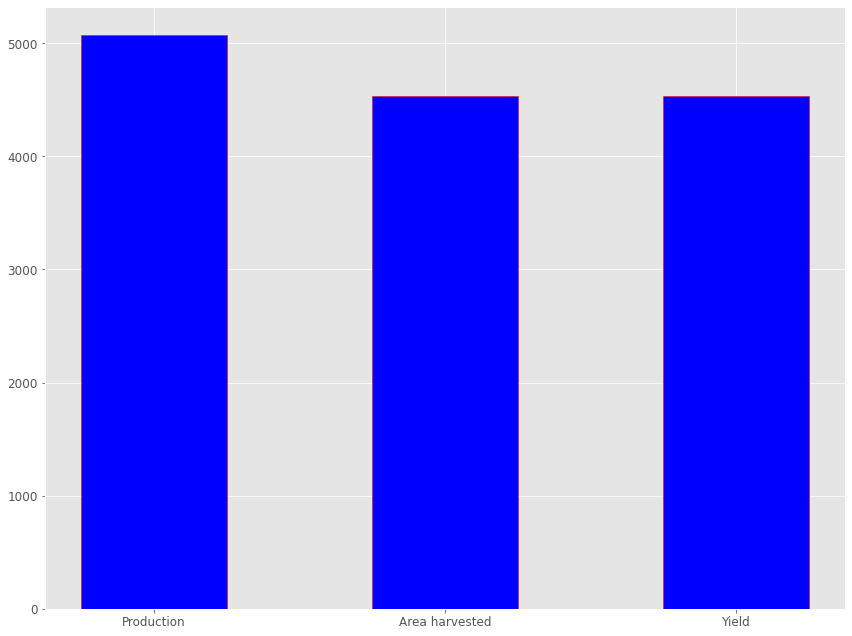

In [13]:
fig, ax = plt.subplots()
ax.bar(x=df1['Element'].value_counts().keys(), height=df1['Element'].value_counts().values, width=0.5, color='blue', align='center', edgecolor='red')

In [14]:
df1['Year'].value_counts().head()

2018    295
2013    293
2010    293
2011    293
2012    293
Name: Year, dtype: int64

In [15]:
df1['Unit'].value_counts()

tonnes    5068
ha        4533
hg/ha     4531
Name: Unit, dtype: int64

<BarContainer object of 3 artists>

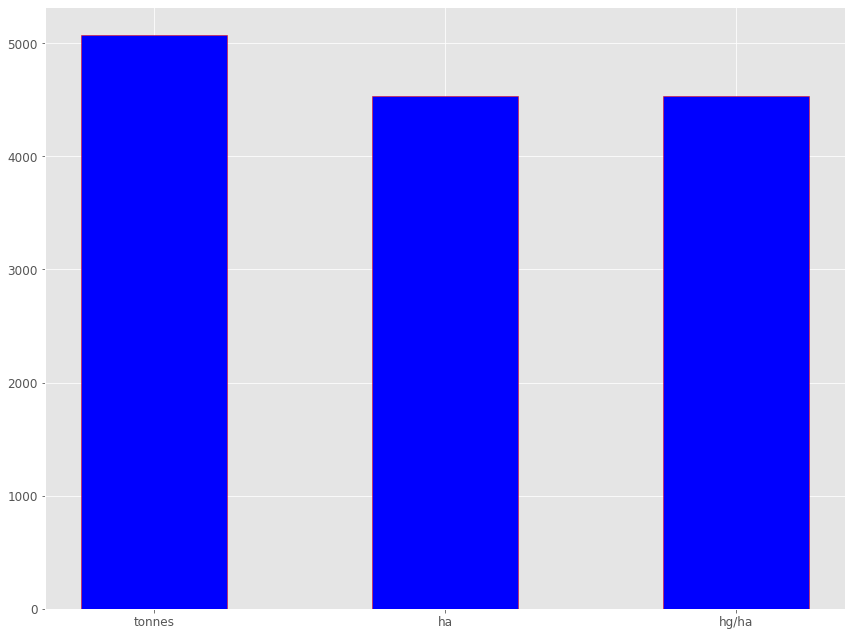

In [16]:
fig, ax = plt.subplots()
ax.bar(x=df1['Unit'].value_counts().keys(), height=df1['Unit'].value_counts().values, width=0.5, edgecolor='red', color='blue')

In [17]:
df1['Value'].describe()

count    1.413200e+04
mean     8.178847e+04
std      2.563691e+05
min      0.000000e+00
25%      2.000000e+03
50%      2.651300e+04
75%      7.857100e+04
max      6.407171e+06
Name: Value, dtype: float64

<AxesSubplot:xlabel='Value', ylabel='Density'>

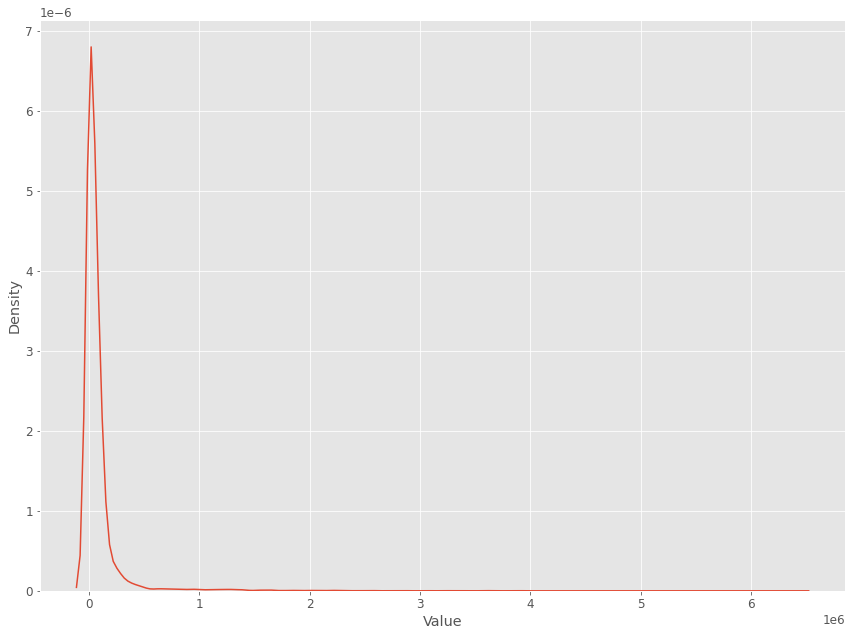

In [18]:
sns.kdeplot(data=df1, x='Value')

# Missing Values Exploration

In [19]:
df1.isna().sum()

Country_or_Area    0
Element            0
Year               0
Unit               0
Value              0
dtype: int64

# Grouping and Aggregation

In [20]:
country_elem_grpd = df1.groupby(['Country_or_Area', 'Element'])                 # group by country_or_area and element
country_elem_grpd.head()

,Country_or_Area,Element,Year,Unit,Value
0,Africa,Area harvested,2018,ha,385249.0
1,Africa,Area harvested,2017,ha,85241.0
2,Africa,Area harvested,2016,ha,88975.0
3,Africa,Area harvested,2015,ha,81448.0
4,Africa,Area harvested,2014,ha,87387.0
...,...,...,...,...,...
14103,Zimbabwe,Production,2018,tonnes,1766.0
14104,Zimbabwe,Production,2017,tonnes,1633.0
14105,Zimbabwe,Production,2016,tonnes,1800.0
14106,Zimbabwe,Production,2015,tonnes,1700.0


# Data Visualization

In [21]:
from matplotlib.ticker import FuncFormatter

# y-axis formatter
def thousand(x, pos):
    return '%1.1fK' % (x * 1e-3)

format_tsd = FuncFormatter(thousand)

def itself(x, pos):
    return (x * 1)

format_self = FuncFormatter(itself)


# line plot helper function
def plot_line(data, x, y, hue=None, size=None, style=None, title=None, xlabel=None, ylabel=None, formatter=None):
    # create fig and axis
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot line chart
    sns.lineplot(
        data=data,
        x=x, y=y, 
        hue=hue, size=size, style=style,
        ax=ax)

    # label plot axis
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    return plot_line

<function __main__.plot_line(data, x, y, hue=None, size=None, style=None, title=None, xlabel=None, ylabel=None, formatter=None)>

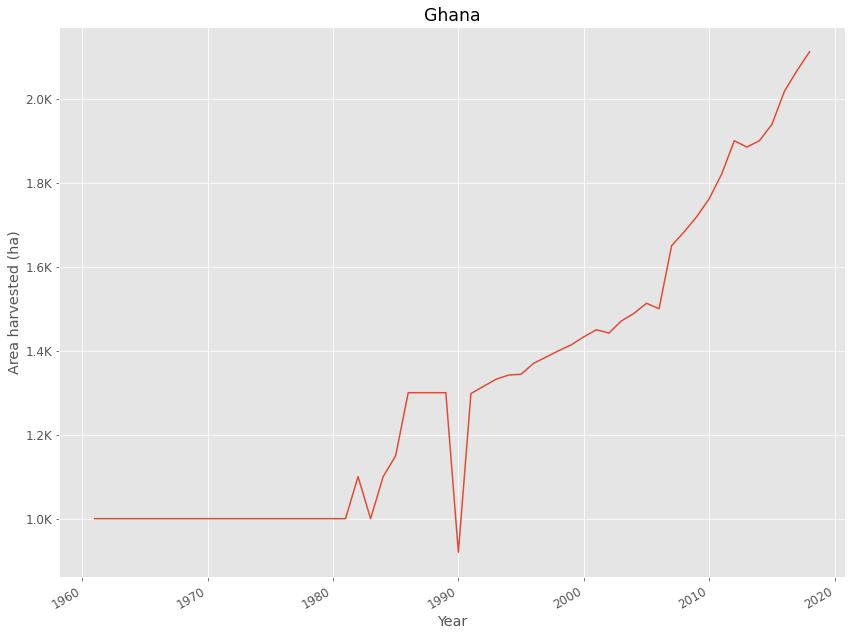

In [22]:
plot_line(
    data=country_elem_grpd.get_group(('Ghana', 'Area harvested')),
    x='Year', y='Value',
    title='Ghana', xlabel='Year', ylabel='Area harvested (ha)',
    formatter=format_tsd
)

<function __main__.plot_line(data, x, y, hue=None, size=None, style=None, title=None, xlabel=None, ylabel=None, formatter=None)>

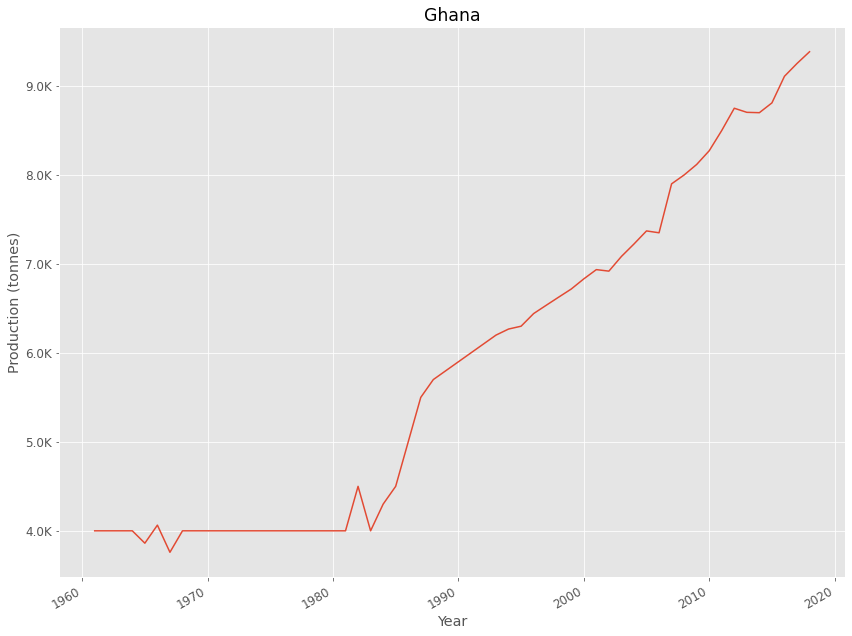

In [23]:
plot_line(
    data=country_elem_grpd.get_group(('Ghana', 'Production')),
    x='Year', y='Value',
    title='Ghana', xlabel='Year', ylabel='Production (tonnes)',
    formatter=format_tsd
)

<function __main__.plot_line(data, x, y, hue=None, size=None, style=None, title=None, xlabel=None, ylabel=None, formatter=None)>

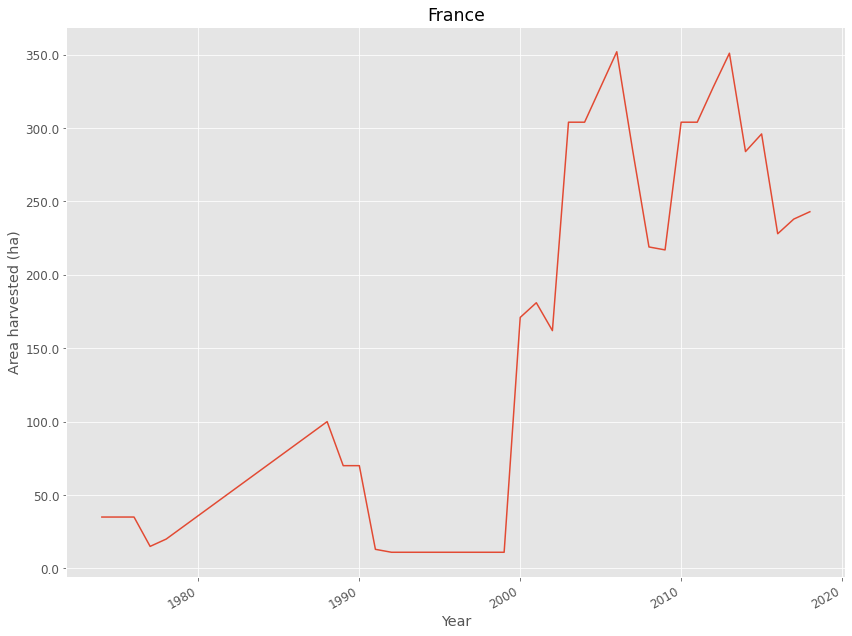

In [24]:
plot_line(
    data=country_elem_grpd.get_group(('France', 'Area harvested')),
    x='Year', y='Value',
    title='France', xlabel='Year', ylabel='Area harvested (ha)',
    formatter=format_self
)

<function __main__.plot_line(data, x, y, hue=None, size=None, style=None, title=None, xlabel=None, ylabel=None, formatter=None)>

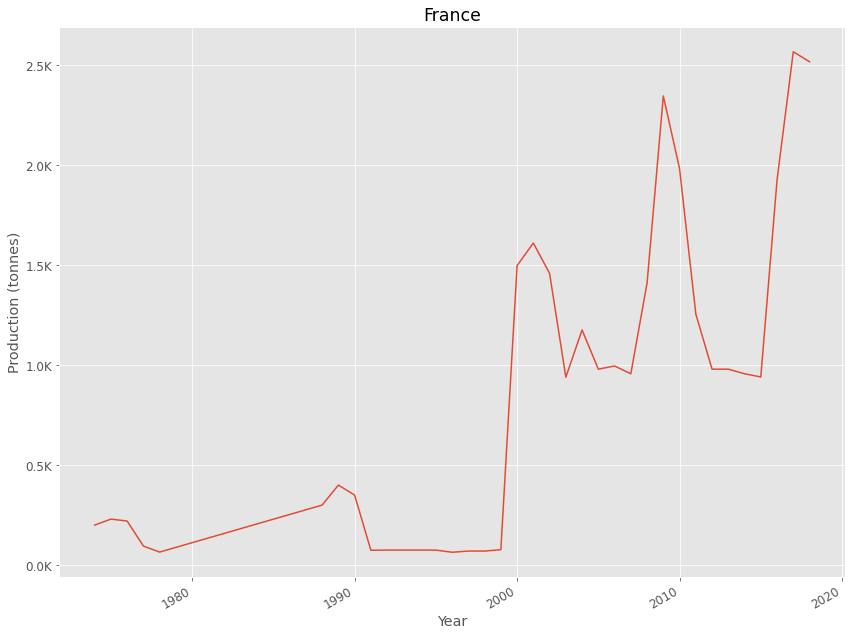

In [25]:
plot_line(
    data=country_elem_grpd.get_group(('France', 'Production')),
    x='Year', y='Value',
    title='France', xlabel='Year', ylabel='Production (tonnes)',
    formatter=format_tsd
)